In [9]:
%matplotlib inline
%config InlineBackend.close_figures=False 
import ipywidgets as widgets
from IPython.display import display,clear_output, Audio
from ipywidgets import HBox, VBox, Layout
import matplotlib.pyplot as plt
from random import shuffle
import sounddevice as sd
import pandas as pd
import numpy as np
import wavio
import time


# Import classes and init random indexes
results = {'index': [],
           'truth': [],
           'prediction': [],
           'issue': []}
df_summary = pd.read_csv('kitchen20.csv')
rand_idxs = list(range(len(df_summary)))
shuffle(rand_idxs)

# Read audio fuction
def play(idx):
    row = df_summary.loc[idx]
    audioRate = 44100
    sound = wavio.read(row.path).data.T[0]
    sd.play(sound, audioRate)
    

#######################
# Class buttons
class_buttons = widgets.ToggleButtons(
    options=['blender', 'boiling-water', 'book', 'chopping', 'clean-dishes',
             'cupboard', 'cutlery', 'dishwasher', 'drawer', 'eat', 'fridge',
             'frying-pan', 'juicer', 'microwave', 'peel', 'plates', 'stove-burner',
             'stove-fan', 'sweep', 'water-flowing'],
    description='Class:')

#######################
# Play button    
play_button = widgets.Button(
    description='replay audio {}'.format(rand_idxs[-1]),
    layout=Layout(width='auto'))

@play_button.on_click
def play_audio(b):
    play(rand_idxs[-1])

#######################
# Issue text
issue_text = widgets.Text(
    description='Report issue:',
    value='',
    disabled=False)
    
#######################
# Next button
next_button = widgets.Button(
    description='Next',
    layout=Layout(width='auto'))

@next_button.on_click
def next_audio(b):    
    # Record prediction
    results['index'].append(rand_idxs[-1])
    results['truth'].append(df_summary.category[rand_idxs[-1]])
    results['prediction'].append(class_buttons.value)
    results['issue'].append(issue_text.value)

    # Change current index
    rand_idxs.pop()
    play(rand_idxs[-1])
    
    # Update view
    play_button.description='replay audio {}'.format(rand_idxs[-1])    
    next_button.layout.visibility='hidden'
    time.sleep(4)
    next_button.layout.visibility='visible'



# Define visual box
tab = VBox(children=[play_button,
                     class_buttons,
                     issue_text,
                     next_button])

display(tab)
play(rand_idxs[-1])

## Save and show results
When you feel tired, you can stop ^^

In [12]:
import os

df_results = pd.DataFrame(results)
name = input('What is your name ?')
os.makedirs('./results')
df_results.to_csv('./results/{}_{}.csv'.format(name,time.time()))
print('Saved')

What is your name ?marc
Saved


Confusion matrix, without normalization


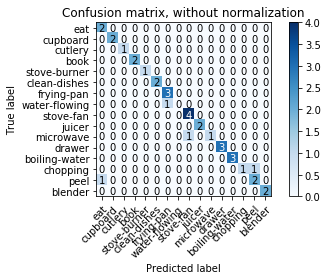

In [5]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
classes = list(set(df_results.truth.append(df_results.prediction)))
y_test = [classes.index(c) for c in df_results.truth]
y_pred = [classes.index(c) for c in df_results.prediction]
plot_confusion_matrix(y_test, y_pred, classes=classes,
                      title='Confusion matrix, without normalization')